# Unemployment in India Analysis

![Amazon Logo](https://www.thestreet.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTY3NTQxMjMwMDg3ODQxNjc4/6-types-of-unemployment-and-what-makes-them-different.png)



## Contents in this Project

1. **Data Loading and Summary Checking**
2. **Data Cleaning**
3. **Feature Extraction**
4. **EDA and Data Visualization**
5. **Conclusion**

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("Unemployment_Data.csv")

In [6]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
data = data.rename(columns={data.columns[0]:'State',data.columns[3]:'EUR',data.columns[4]:'EE', data.columns[5]:'ELPR', data.columns[6]:'Region'})
data.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
data.State.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [12]:
data.Region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [16]:
group_region = data.groupby(['Region'])[['EUR', 'EE', 'ELPR']].mean().reset_index()
group_region = round(group_region,2)
group_region

,Region,EUR,EE,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

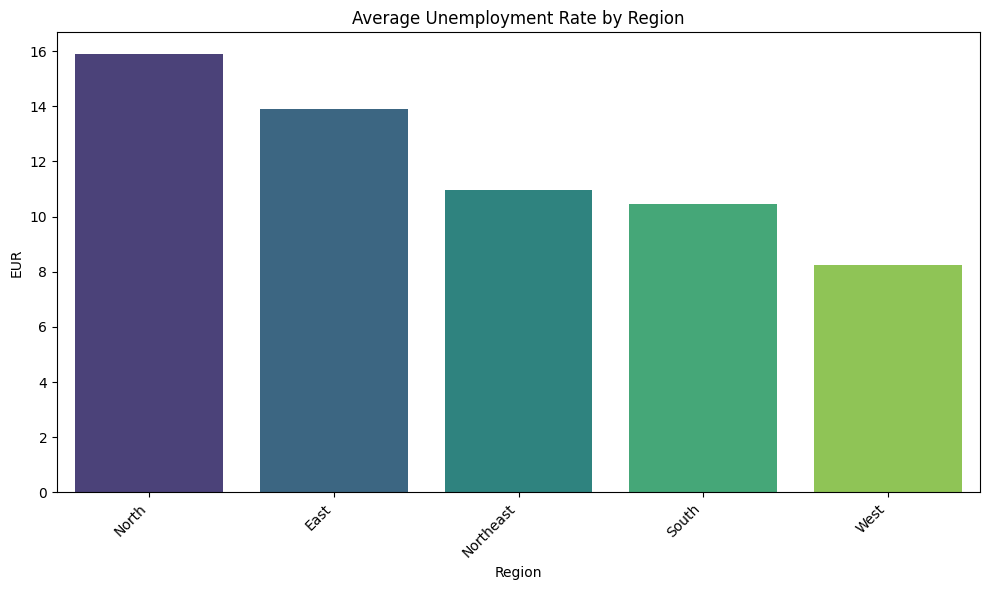

In [18]:
group_region_sorted = group_region.sort_values(by='EUR', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='EUR', data=group_region_sorted, palette='viridis')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('EUR')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
group_state = data.groupby(['State'])[['EUR', 'EE', 'ELPR']].mean().reset_index()
group_state = round(group_state,2)
group_state.head()

,State,EUR,EE,ELPR
0,Andhra Pradesh,8.66,15425480.0,38.96
1,Assam,4.86,10810275.5,43.50
2,Bihar,19.47,23606828.0,37.17
3,Chhattisgarh,7.82,8421349.2,41.16
4,Delhi,18.41,4632821.9,35.86
